In [78]:
#Standard imports 
# Needs to be run after the '7 Countries.ipynb' notebook

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cbook
import numpy as np
import json
import requests as req
from PIL import Image
import warnings
%matplotlib inline

url = 'http://api.worldbank.org/v2/countries/'
url_tail = '/indicators/PV.EST?format=json'

file = 'Saved Dataframes/Success Rates by Country by Year.csv'
df = pd.read_csv(file,index_col=0)
df.head()

,country,year,region,success_rate,num_attacks,country_code,gdp_value
0,Afghanistan,1973,South Asia,0.000000,5,AF,1.733333e+09
1,Afghanistan,1979,South Asia,0.800000,10,AF,3.697940e+09
2,Afghanistan,1979,South Asia,0.529412,17,AF,3.697940e+09
64,Afghanistan,2001,South Asia,0.666667,3,AF,2.461666e+09
65,Afghanistan,2001,South Asia,0.600000,5,AF,2.461666e+09


In [34]:
# worldbank API - political stability index
countries = ['Iraq','Pakistan','Thailand','Nigeria','Colombia','United Kingdom','United States']
country_codes = ['IRQ','PAK','THA','NGA','COL','GBR','USA']

# psi = politcal stability index
columns = ['country','year','psi']
df_ps = pd.DataFrame(columns=columns)

#create dataframe of psi values
for country in country_codes:
    response = req.get(url+country+url_tail).json()
    for year in response[1]:
        current_df = pd.DataFrame([[year['country']['value'],int(year['date']),year['value']]],columns=columns)
        df_ps = df_ps.append(current_df)
    
final_df = df.merge(df_ps,on=['country','year'],how='inner')
final_df

,country,year,region,success_rate,num_attacks,country_code,gdp_value,psi
0,Colombia,1996,South America,0.571429,7,CO,9.716011e+10,-1.641695
1,Colombia,1996,South America,0.555556,9,CO,9.716011e+10,-1.641695
2,Colombia,1996,South America,0.583333,12,CO,9.716011e+10,-1.641695
3,Colombia,1996,South America,0.562500,16,CO,9.716011e+10,-1.641695
4,Colombia,1996,South America,0.526316,19,CO,9.716011e+10,-1.641695
5,Colombia,1996,South America,0.523810,21,CO,9.716011e+10,-1.641695
6,Colombia,1996,South America,0.521739,23,CO,9.716011e+10,-1.641695
7,Colombia,1996,South America,0.076923,13,CO,9.716011e+10,-1.641695
8,Colombia,1996,South America,0.666667,3,CO,9.716011e+10,-1.641695
9,Colombia,1996,South America,0.600000,5,CO,9.716011e+10,-1.641695


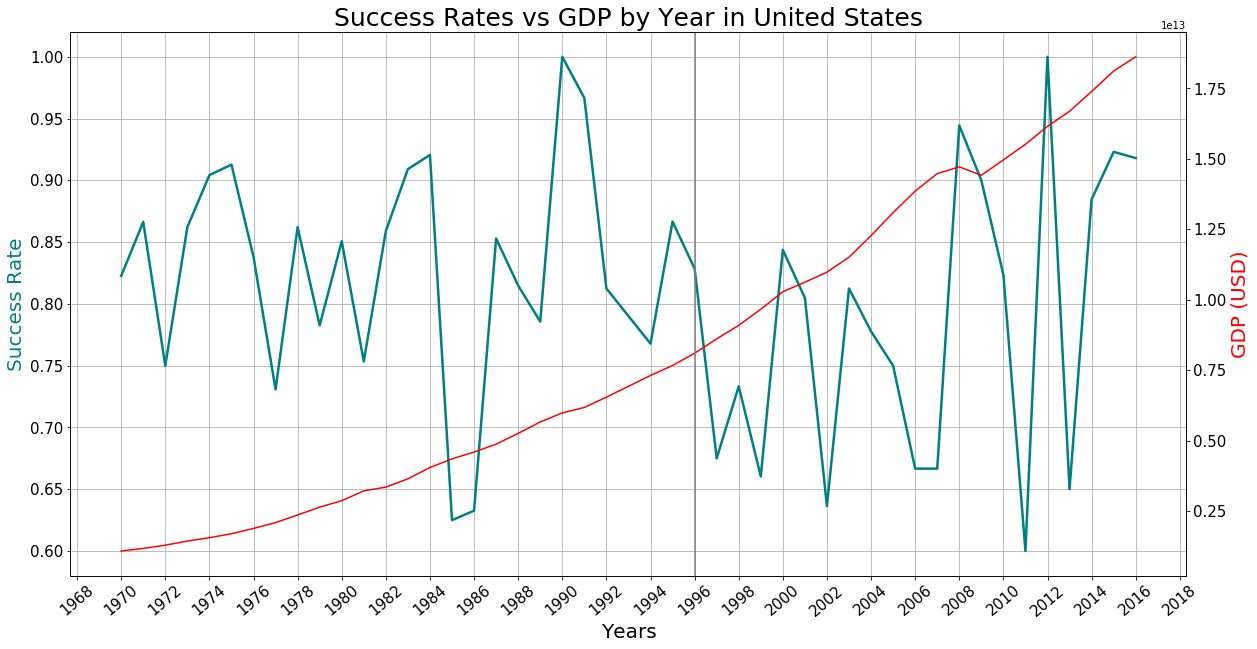

In [26]:
# create Success rates plot
for country in countries:
    plt.close()
    fig,ax1 = plt.subplots()
    
    dataframe = df[df['country'] == country]
    dataframe_psi = final_df[final_df['country'] == country]
    year_psi_min = dataframe_psi['year'].min()
    
    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax1.plot(dataframe['year'],dataframe['success_rate'],color='teal',linewidth=2.5)

    plt.title('Success Rates vs GDP by Year in '+country,size=25)
    plt.ylabel('Success Rate',color='teal',size=20)
    plt.xlabel('Years',size=20)
    plt.grid(True)

    start,end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(round(start),end,2))
    ax1.tick_params(axis='x',rotation=40,labelsize=15)
    ax1.tick_params(axis='y',labelsize=15)

    ax2 = ax1.twinx()
    ax2.plot(dataframe['year'],dataframe['gdp_value'],color='r')
    ax2.tick_params(axis='y',labelsize=15)
    
    plt.axvline(x=year_psi_min, hold=None,color='gray')
    plt.ylabel('GDP (USD)',color='r',size=20)
    plt.savefig('Plots/Success Rates by Year in '+country+'.png',facecolor='white')


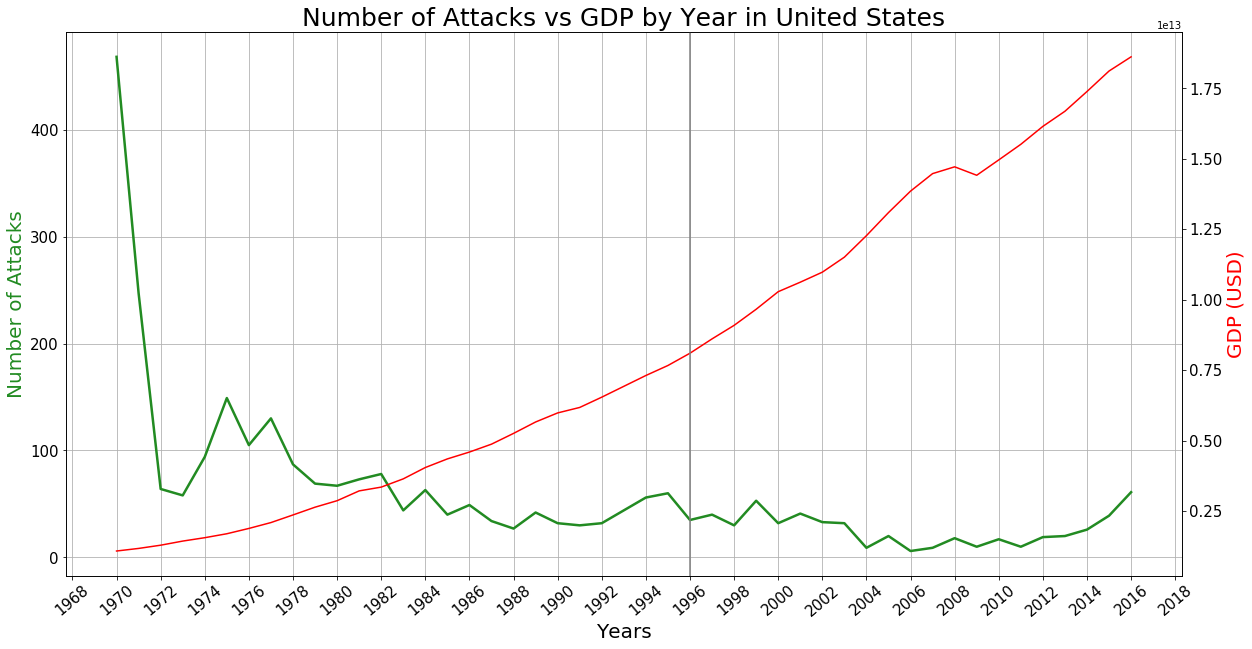

In [27]:
for country in countries:
    plt.close()
    fig,ax1 = plt.subplots()
    
    dataframe = df[df['country'] == country]
    
    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax1.plot(dataframe['year'],dataframe['num_attacks'],color='forestgreen',linewidth=2.5)

    plt.title('Number of Attacks vs GDP by Year in '+country,size=25)
    plt.ylabel('Number of Attacks',color='forestgreen',size=20)
    plt.xlabel('Years',size=20)
    plt.grid(True)

    start,end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(round(start),end,2))
    ax1.tick_params(axis='x',rotation=40,labelsize=15)
    ax1.tick_params(axis='y',labelsize=15)

    ax2 = ax1.twinx()
    ax2.plot(dataframe['year'],dataframe['gdp_value'],color='r')
    ax2.tick_params(axis='y',labelsize=15)

    plt.ylabel('GDP (USD)',color='r',size=20)
    plt.axvline(x=year_psi_min, hold=None,color='gray')
    plt.savefig('Plots/Attacks by Year in '+country+'.png',facecolor='white')

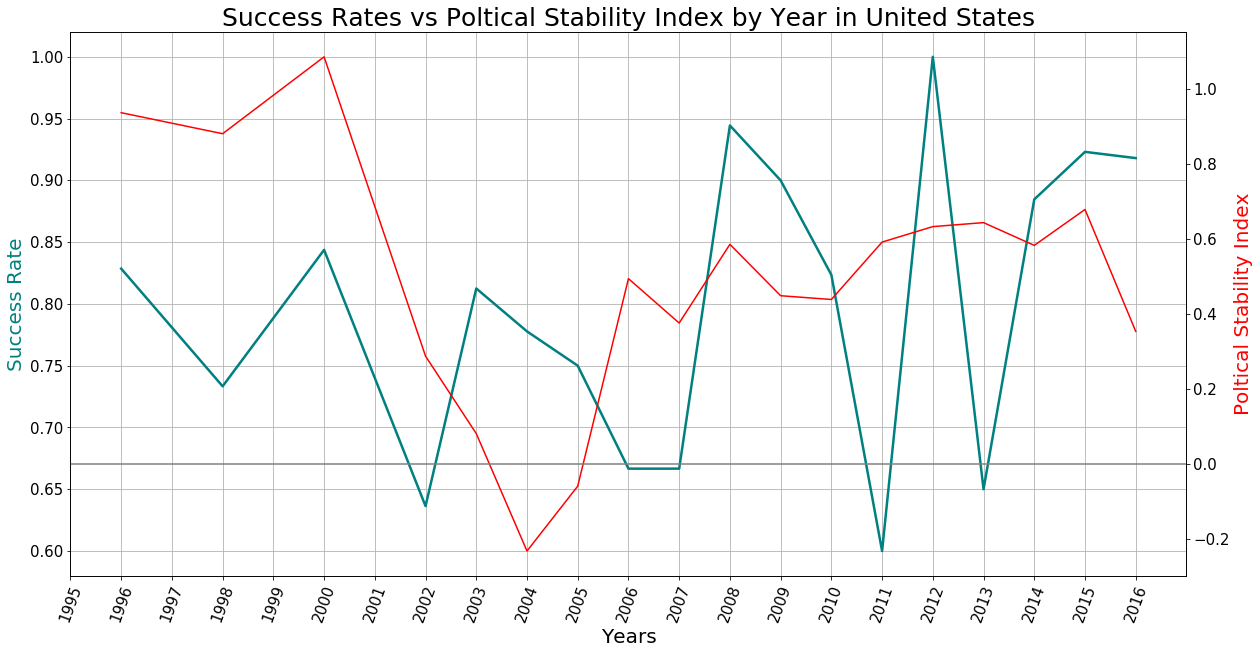

In [29]:
#final_df = final_df[final_df['num_attacks']>5]

for country in countries:
    plt.close()
    fig,ax1 = plt.subplots()

    dataframe = final_df[final_df['country'] == country]

    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax1.plot(dataframe['year'],dataframe['success_rate'],color='teal',linewidth=2.5)

    plt.title('Success Rates vs Poltical Stability Index by Year in '+country,size=25)
    plt.ylabel('Success Rate',color='teal',size=20)
    plt.xlabel('Years',size=20)
    plt.grid(True)

    start,end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(round(start),end,1))
    ax1.tick_params(axis='x',rotation=70,labelsize=15)
    ax1.tick_params(axis='y',labelsize=15)

    ax2 = ax1.twinx()
    ax2.plot(dataframe['year'],dataframe['psi'],color='r')
    ax2.tick_params(axis='y',labelsize=15)

    plt.ylabel('Poltical Stability Index',color='r',size=20)
    plt.axhline(y=0, hold=None,color='gray')
    plt.savefig('Plots/Success Rates vs PSI by Year in '+country+'.png',facecolor='white')

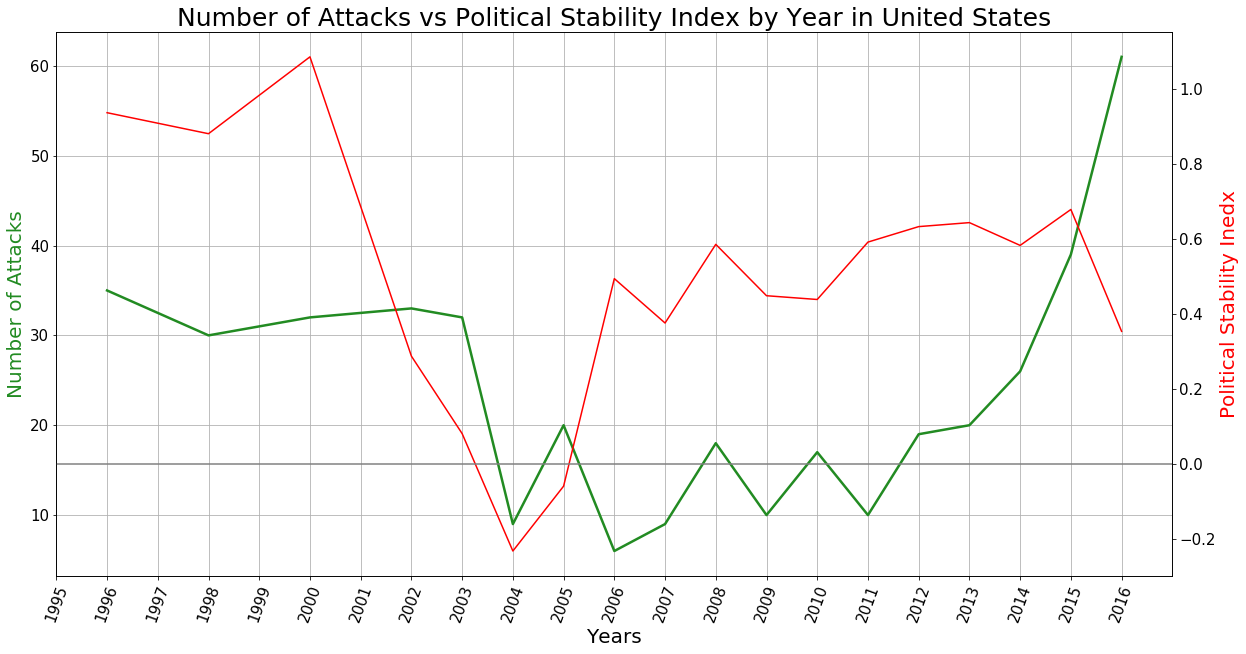

In [30]:
for country in countries:
    plt.close()
    fig,ax1 = plt.subplots()
    
    dataframe = final_df[final_df['country'] == country]

    fig.set_figwidth(20)
    fig.set_figheight(10)
    ax1.plot(dataframe['year'],dataframe['num_attacks'],color='forestgreen',linewidth=2.5)

    plt.title('Number of Attacks vs Political Stability Index by Year in '+country,size=25)
    plt.ylabel('Number of Attacks',color='forestgreen',size=20)
    plt.xlabel('Years',size=20)
    plt.grid(True)

    start,end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(round(start),end,1))
    ax1.tick_params(axis='x',rotation=70,labelsize=15)
    ax1.tick_params(axis='y',labelsize=15)

    ax2 = ax1.twinx()
    ax2.plot(dataframe['year'],dataframe['psi'],color='r')
    ax2.tick_params(axis='y',labelsize=15)

    plt.ylabel('Political Stability Inedx',color='r',size=20)
    plt.axhline(y=0, hold=None,color='gray')
    plt.savefig('Plots/Attacks vs PSI by Year in '+country+'.png',facecolor='white')

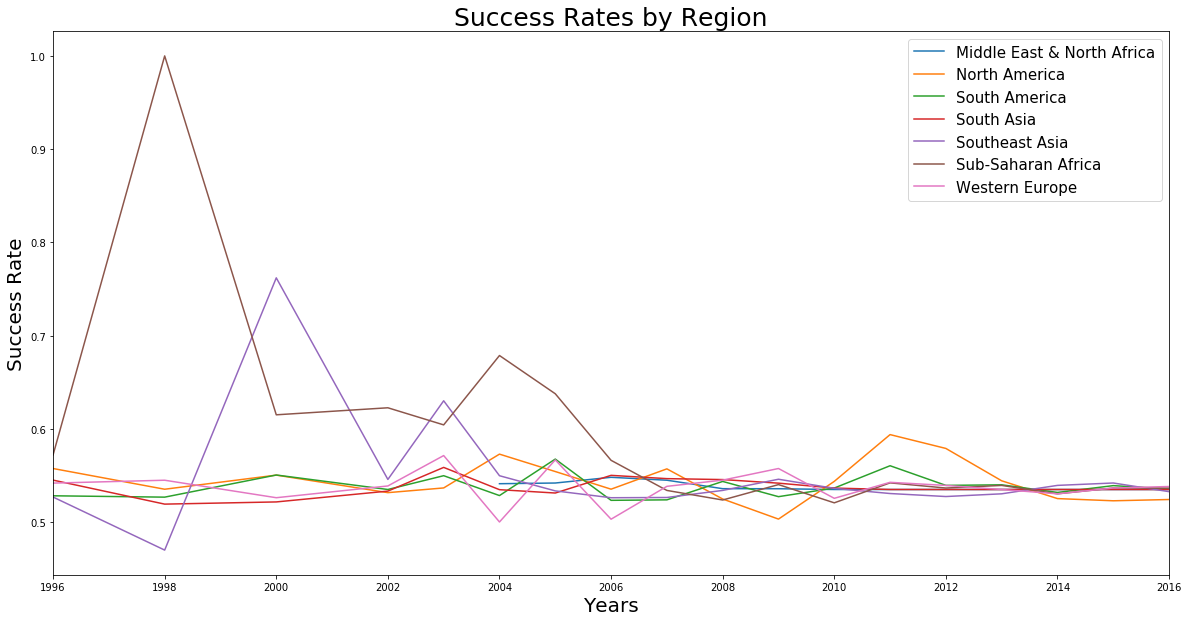

In [159]:
# Success Rates by Region
df_region = final_df[['region','year','success_rate','num_attacks']].groupby(['region','year']).mean()
df_region = df_region.reset_index()

regions = df_region['region'].unique().tolist()


region_headers = df_region.columns.tolist()
region_headers
plt.close('all')
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
                        
years = df_region['year'].sort_values().unique().tolist()

fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)

for region in regions:
    current_region = df_region[df_region['region']==region]
    plt.plot(current_region['year'],current_region['success_rate'])



ax.set_xticks(np.arange(min(years),max(years)+1,2))
plt.legend(regions,fontsize=15)
plt.title('Success Rates by Region',size=25)
plt.ylabel('Success Rate',size=20)
plt.xlabel('Years',size=20)
plt.xlim(df_region['year'].min(),df_region['year'].max())
plt.savefig('Plots/Success Rates by Region.png')
plt.show()

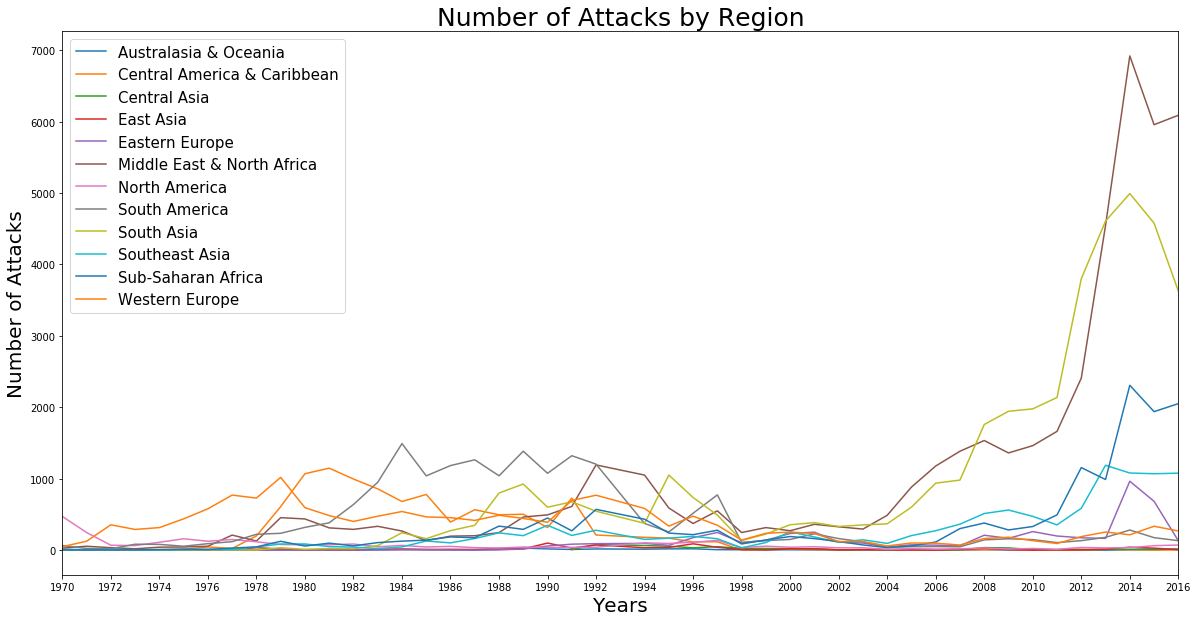

In [157]:
# Number of Attacks by Region
regionfile = 'Saved Dataframes/GTD.csv'
df_for_region = pd.read_csv(regionfile,encoding='latin1')

df_region_atks = df_for_region[['region','year','month']].groupby(['region','year']).count()
df_region_atks = df_region_atks.reset_index()

regions = df_region_atks['region'].unique().tolist()


region_headers = df_region_atks.columns.tolist()
region_headers

plt.close('all')
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
                        
years = df_region_atks['year'].sort_values().unique().tolist()

fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)



span = range(len(regions))
for count in span:
    current_region = df_region_atks[df_region_atks['region']==regions[count]]
    
    plt.plot(current_region['year'],current_region['month'])


ax.set_xticks(np.arange(min(years),max(years)+1,2))
plt.legend(regions,fontsize=15)
plt.title('Number of Attacks by Region',size=25)
plt.ylabel('Number of Attacks',size=20)
plt.xlabel('Years',size=20)
plt.xlim(df['year'].min(),df['year'].max())
plt.savefig('Plots/Number of Attacks by Region.png')
plt.show()

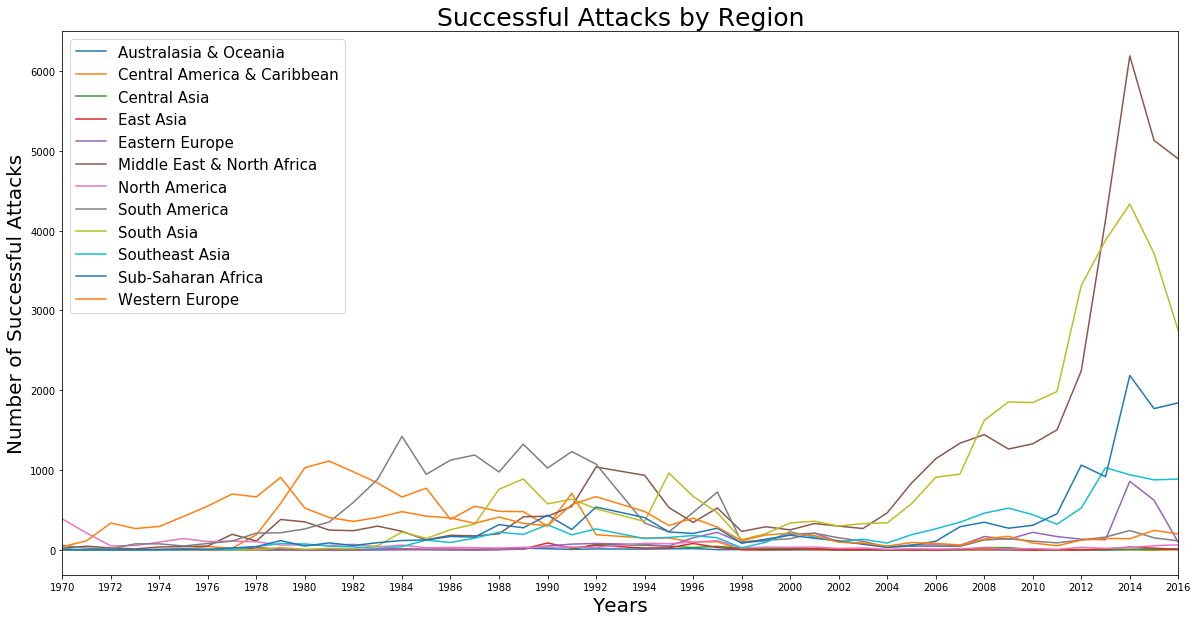

In [161]:
df_region_atks = df_for_region[['region','year','success']].groupby(['region','year']).sum()
df_region_atks = df_region_atks.reset_index()

regions = df_region_atks['region'].unique().tolist()


region_headers = df_region_atks.columns.tolist()
region_headers

plt.close('all')
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
                        
years = df_region_atks['year'].sort_values().unique().tolist()

fig,ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)



span = range(len(regions))
for count in span:
    current_region = df_region_atks[df_region_atks['region']==regions[count]]
    
    plt.plot(current_region['year'],current_region['success'])


ax.set_xticks(np.arange(min(years),max(years)+1,2))
plt.legend(regions,fontsize=15)
plt.title('Successful Attacks by Region',size=25)
plt.ylabel('Number of Successful Attacks',size=20)
plt.xlabel('Years',size=20)
plt.xlim(df['year'].min(),df['year'].max())
plt.savefig('Plots/Successful Attacks by Region.png')
plt.show()

In [31]:
for country in countries:
    images_list = ['Plots/Attacks by Year in '+country+'.png','Plots/Success Rates by Year in '+country+'.png']
    imgs = [Image.open(i) for i in images_list]

    img_merge = np.hstack(np.asarray(i) for i in imgs)
    img_merge = Image.fromarray(img_merge)
    img_merge.save('Plots/'+country+'.png')

for country in countries:
    images_list = ['Plots/Attacks vs PSI by Year in '+country+'.png','Plots/Success Rates vs PSI by Year in '+country+'.png']
    imgs = [Image.open(i) for i in images_list]

    img_merge = np.hstack(np.asarray(i) for i in imgs)
    img_merge = Image.fromarray(img_merge)
    img_merge.save('Plots/'+country+' PSI.png')
    
for country in countries:
    images_list = ['Plots/'+country+'.png','Plots/'+country+' PSI.png']
    imgs = [Image.open(i) for i in images_list]

    img_merge = np.vstack(np.asarray(i) for i in imgs)
    img_merge = Image.fromarray(img_merge)
    img_merge.save('Plots/All Plots '+country+'.png')